In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [16]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('Dataset.xlsx')

print(df.head())

Saving Dataset.xlsx to Dataset.xlsx
                                    Item  Ontario 1996  Ontario 1997  \
0                      Glass ('000 sq m)        2377.0        2369.0   
1                    Plastic ('000 sq m)        3240.0        3660.0   
2                 Total Area ('000 sq m)        5617.0        6029.0   
3       sales to retail florists ($'000)       64538.0       60858.0   
4  sales to domestic wholesalers ($'000)      116077.0      129000.0   

   Ontario 1998  Ontario 1999  Ontario 2000  Ontario 2001  Ontario 2002  \
0        2108.0        2069.0        2274.0        2320.0        2359.0   
1        4521.0        5386.0        6023.0        6649.0        7225.0   
2        6629.0        7455.0        8297.0        8969.0        9584.0   
3       48053.0       49304.0       71812.0       77965.0       84538.0   
4      154513.0      162475.0      199844.0      217369.0      267269.0   

   Ontario 2003 Ontario 2004  ...  Canada 2015  Canada 2016  Canada 2017  \
0   

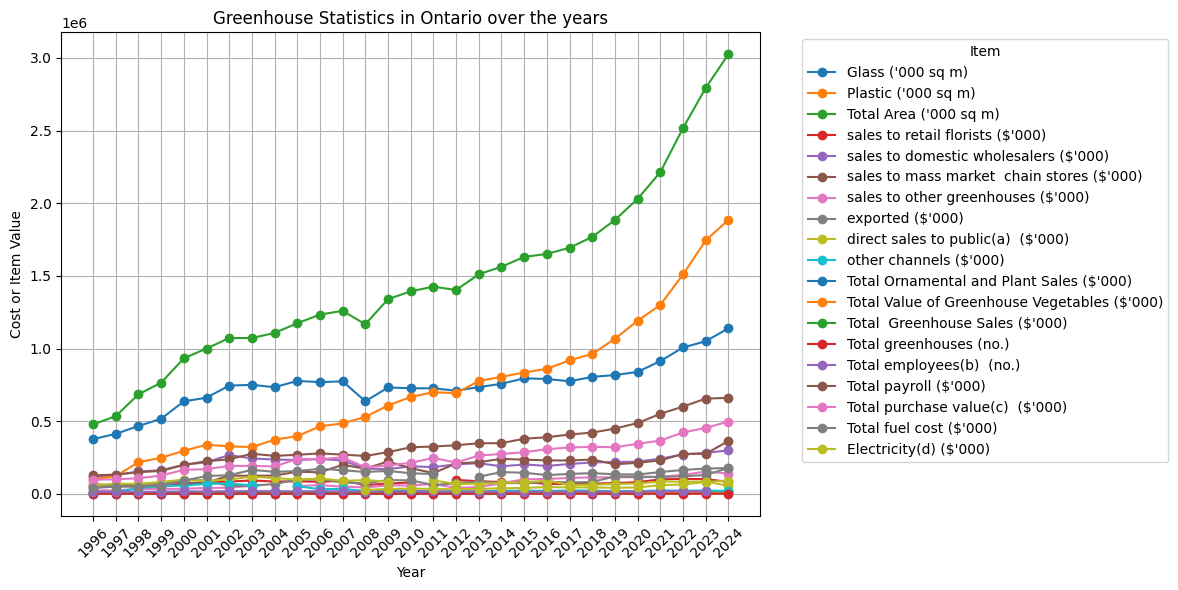

In [23]:
# Extract Ontario columns
ontario_df = df[['Item'] + [col for col in df.columns if 'Ontario' in col]]

# Convert all values to numeric where applicable
for col in ontario_df.columns[1:]:
    ontario_df.loc[:, col] = pd.to_numeric(ontario_df[col], errors='coerce')  # 'x' → NaN

# Set 'Item' as index
ontario_df.set_index('Item', inplace=True)

# Transpose and clean year labels
ontario_transposed = ontario_df.T
ontario_transposed.index = ontario_transposed.index.str.replace('Ontario ', '')

# Plot
plt.figure(figsize=(12, 6))
for item in ontario_transposed.columns:
    plt.plot(ontario_transposed.index, ontario_transposed[item], marker='o', label=item)

plt.title("Greenhouse Statistics in Ontario over the years")
plt.xlabel("Year")
plt.ylabel("Cost or Item Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

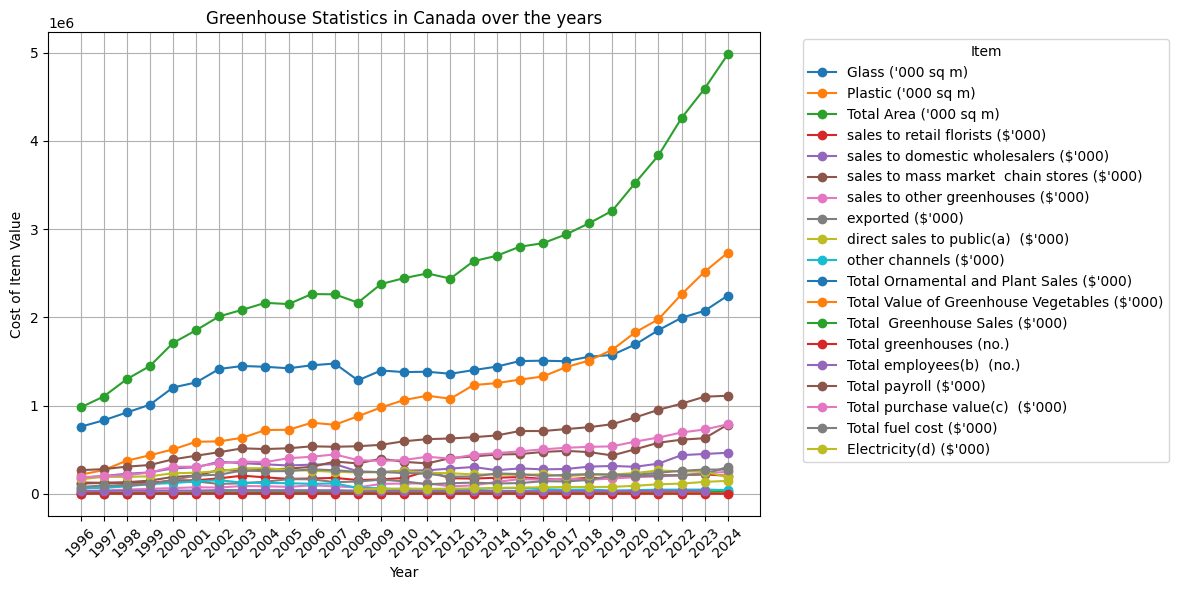

In [24]:
# Extract Canada columns
canada_df = df[['Item'] + [col for col in df.columns if 'Canada' in col]]

# Convert all values to numeric where applicable
for col in canada_df.columns[1:]:
    canada_df.loc[:, col] = pd.to_numeric(canada_df[col], errors='coerce')  # 'x' → NaN

# Set 'Item' as index
canada_df.set_index('Item', inplace=True)

# Transpose and clean year labels
canada_transposed = canada_df.T
canada_transposed.index = canada_transposed.index.str.replace('Canada ', '')

# Plot
plt.figure(figsize=(12, 6))
for item in canada_transposed.columns:
    plt.plot(canada_transposed.index, canada_transposed[item], marker='o', label=item)

plt.title("Greenhouse Statistics in Canada over the years")
plt.xlabel("Year")
plt.ylabel("Cost of Item Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()